In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import python_tools.voidfitter as vf
from python_tools.utilities import FigureUtilities
%matplotlib inline

handle_obs = '/media/epaillasv/BlackIce/eboss/minerva_cats/void_stats/\
redshift_redshift/\
Galaxies_HOD_*_z0.57_Redshift_Redshift.SVF_recen_ovl0.5.VG_CCF_rmu'

handle_mocks = '/media/epaillasv/BlackIce/eboss/minerva_cats/void_stats/\
redshift_redshift/\
Galaxies_HOD_*_z0.57_Redshift_Redshift.SVF_recen_ovl0.5.VG_CCF_rmu'

CaiModel = vf.CaiModel(handle_obs, handle_mocks, mock_observation=True)

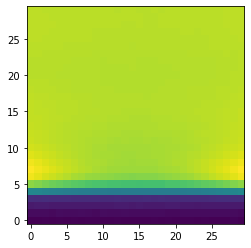

In [3]:
fig, ax = plt.subplots(1, figsize=(4,4))

s = CaiModel.s_for_xi
mu = CaiModel.mu_for_xi
xi_smu = CaiModel.xi_smu(s, mu)

ax.imshow(xi_smu, origin='lower')

plt.show()

In [3]:
print(CaiModel.icov)

[[ 1.20669977e+04 -8.31988849e+03 -7.11132143e+02 ...  1.06847188e+04
   3.72724840e+03  3.40010313e+03]
 [-8.31988849e+03  4.55891004e+04 -1.02196040e+04 ... -5.33851026e+03
  -4.07065539e+04  4.89948220e+04]
 [-7.11132143e+02 -1.02196040e+04  4.89514266e+04 ... -1.62021138e+04
   3.30341589e+04 -1.22005267e+04]
 ...
 [ 1.06847188e+04 -5.33851026e+03 -1.62021138e+04 ...  9.53978127e+05
  -1.15662551e+05 -1.50783065e+05]
 [ 3.72724840e+03 -4.07065539e+04  3.30341589e+04 ... -1.15662551e+05
   7.44463806e+05 -3.61018126e+05]
 [ 3.40010313e+03  4.89948220e+04 -1.22005267e+04 ... -1.50783065e+05
  -3.61018126e+05  7.85230642e+05]]


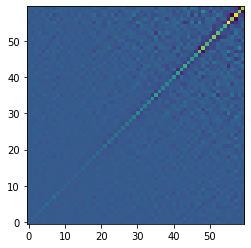

In [4]:
fig, ax = plt.subplots(1, figsize=(4,4))


ax.imshow(CaiModel.icov, origin='lower')

plt.show()

In [5]:
from scipy.special import hyp2f1

# cosmology for Minerva
om_m = 0.285
s80 = 0.828
omega_l = 1. - om_m

bias = 2.3
eff_z = 0.57

az = 1. / (1 + eff_z)
f = ((om_m * (1 + eff_z)**3.) / (om_m * (1 + eff_z)**3 + omega_l))**0.55
growth = az ** 2.5 * np.sqrt(omega_l + om_m * az ** (-3.)) * \
              hyp2f1(5. / 6, 3. / 2, 11. / 6, -(omega_l * az ** 3.) / om_m) / \
              hyp2f1(5. / 6, 3. / 2, 11. / 6, -omega_l / om_m)

beta = f / bias
G = 2 * beta / (3 + beta)

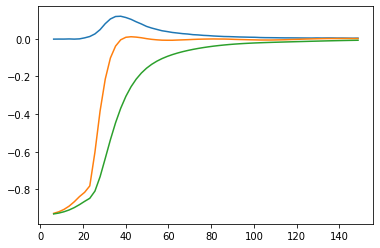

In [2]:
s = CaiModel.s_for_xi
mu = CaiModel.mu_for_xi
epsilon = 1.0
alpha = 1.0
alpha_para = alpha * epsilon ** (-2/3)
alpha_perp = epsilon * alpha_para

xi0, xibar, xi2 = CaiModel.theory_multipoles(alpha_perp, alpha_para, s, mu)

fig, ax = plt.subplots(1, figsize=(6,4))
ax.plot(s, xi2)
ax.plot(s, xi0)
ax.plot(s, xibar)
plt.show()

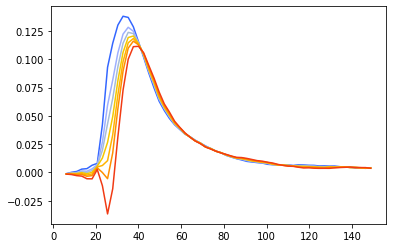

In [7]:
s = CaiModel.s_for_xi
mu = CaiModel.mu_for_xi
epsilons = [0.96, 0.98, 0.99, 1.0, 1.01, 1.02, 1.04]

fu = FigureUtilities()
colors = fu.RdYlBu[[1, 2, 3, 4, 5, 6, 7, 8]]
fig, ax = plt.subplots(1, figsize=(6,4))

for i in range(len(epsilons)):
    epsilon = epsilons[i]

    alpha = 1.0
    alpha_para = alpha * epsilon ** (-2/3)
    alpha_perp = epsilon * alpha_para

    xi0, xibar, xi2 = CaiModel.theory_multipoles(alpha_perp, alpha_para, s, mu)

    ax.plot(s, xi2, color=colors[i])
    
plt.show()

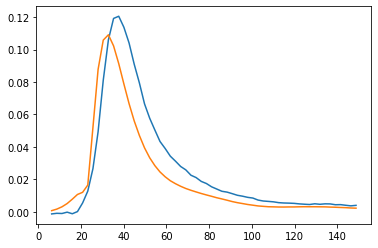

In [9]:
s = CaiModel.s_for_xi
mu = CaiModel.mu_for_xi
fu = FigureUtilities()
colors = fu.RdYlBu[[1, 2, 3, 4, 5, 6, 7, 8]]
fig, ax = plt.subplots(1, figsize=(6,4))

epsilon = 1.0

xi2 = CaiModel.get_AP_multipole(CaiModel.xi2_APSpline, epsilon)
xi0 = CaiModel.get_AP_multipole(CaiModel.xi0_APSpline, epsilon)
xibar = CaiModel.get_AP_multipole(CaiModel.xibar_APSpline, epsilon)

beta_test=0.43
G_test = 2 * beta_test / (3 + beta_test)

ax.plot(s, xi2)
ax.plot(s, G_test * (xi0 - xibar))

plt.show()


100%|██████████| 500/500 [01:38<00:00,  4.63it/s]


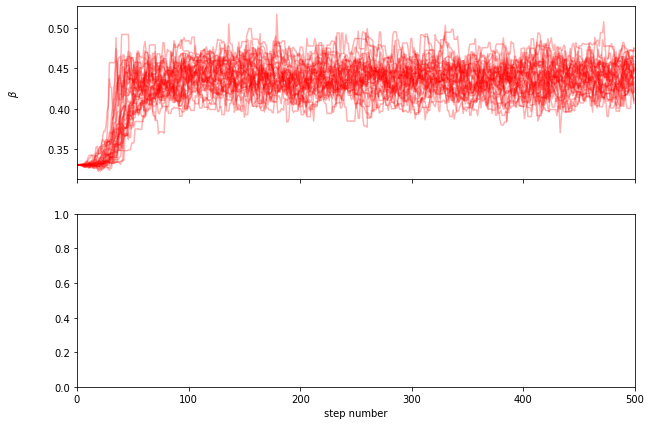

In [3]:
CaiModel.run_mcmc()

In [7]:
CaiModel.fs8 / CaiModel.bs8

0.3302974389788947